<a href="https://colab.research.google.com/github/ChandraShekhar-CSR/AI-and-ML/blob/main/Worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building Fully Connected Neural Networks for Devnagari

**Handwritten Digit Classification**

# Task 1: Data Preparation
Loading the Data

• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Hints:

• Ensure that the images are resized to a consistent shape (e.g., 28x28).

• Convert labels to one-hot encoded format for multi-class classification.


In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_dir="/content/drive/MyDrive/AI and ML/Worksheet4/DevanagariHandwrittenDigitDataset/Test"
test_dir="/content/drive/MyDrive/AI and ML/Worksheet4/DevanagariHandwrittenDigitDataset/Train"
#define image size
img_height=28
img_width=28
#funtion to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            #load iamge using PIL
            img = Image.open(img_path).convert('L')
            #resize image
            img = img.resize((img_height, img_width))
            #convert image to numpy array
            img_array = np.array(img)
            #normalize image
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [6]:
#load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape and One-Hot Encoding Labels

Training data shape: (3010, 28, 28, 1)
Training labels shape: (3010, 10)
Testing data shape: (16920, 28, 28, 1)
Testing labels shape: (16920, 10)


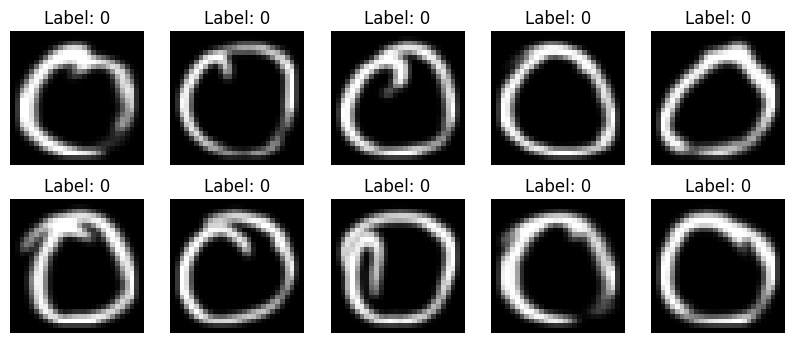

In [7]:
#reshape images for keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
#one-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
#print dataset shape
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)
#visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(img_height, img_width), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

# Task 2: Build the FCN Model

Model Architecture

• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(img_height, img_width, 1)),
    Dense(64, activation='sigmoid'), #1st hidden layer
    Dense(128, activation='sigmoid'), #2nd
    Dense(256, activation='sigmoid'), #3rd
    Dense(10, activation='softmax') #output layer for 10 classes
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [10]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1295 - loss: 2.2436 - val_accuracy: 0.0033 - val_loss: 6.0588
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1712 - loss: 2.0379 - val_accuracy: 0.0000e+00 - val_loss: 6.8257
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4489 - loss: 1.8826 - val_accuracy: 0.0000e+00 - val_loss: 6.9601
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4805 - loss: 1.5713 - val_accuracy: 0.0000e+00 - val_loss: 7.0199
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6728 - loss: 1.2447 - val_accuracy: 0.0033 - val_loss: 7.1922
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7740 - loss: 0.9950 - val_accuracy: 0.0017 - val_loss: 7.2975
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8190 - loss: 0.7569 - val_accuracy: 0.0033 - val_loss: 7.5397
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8474 - loss: 0.5643 - val_accuracy

# Task 5: Evaluate the Model

Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

529/529 - 3s - 6ms/step - accuracy: 0.7525 - loss: 2.0715
Test accuracy: 0.7525


# Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.



In [13]:
model.save('devnagari_fcn.h5')
loaded_model = tf.keras.models.load_model('devnagari_fcn.h5')
loaded_model.evaluate(x_test, y_test)

529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9215 - loss: 0.3941


[2.0714621543884277, 0.7524822950363159]

# Task 7: Predictions

Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().


In [14]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
#displaying first 10 predeictions
for i in range(10):
  print(f"Predicted label: {predicted_labels[i]}, Actual:{np.argmax(y_test[i])}")

529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0
Predicted label: 0, Actual:0


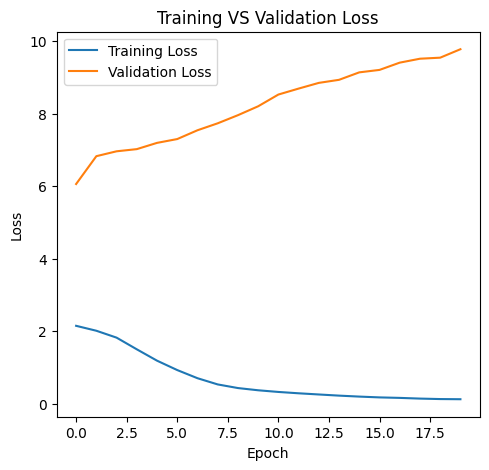

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training VS Validation Loss")
plt.legend()